In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [8]:
dataset=pd.read_csv("weather_forecast_data.csv")

In [9]:
dataset.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


# **Temperature** :  in Celcius
# **Humidity** : in % How much humidity
# **Wind Speed**:  in m/s
# **Cloud Cover**:  how much sky is covered with clouds in %
# **Pressure hPa unit**: , High Pressure means clear sky , and low pressure means storm, rains like or cloudy
# **Rain** : The column which to be predicted

In [10]:
dataset.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [11]:
rain_sample=len(dataset[dataset['Rain']=="rain"])
no_rain_sample=len(dataset[dataset['Rain']=="no rain"])

print("Rain Samples: ",rain_sample)
print("No Rain Samples: ",no_rain_sample)

Rain Samples:  314
No Rain Samples:  2186


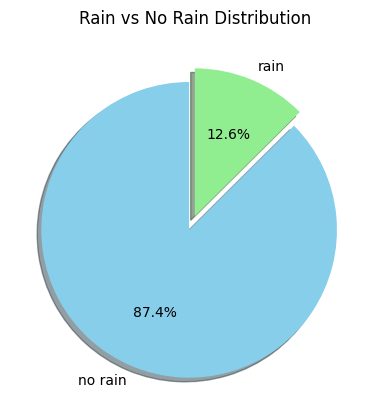

In [12]:
labels=['no rain',"rain"]
sizes=[no_rain_sample,rain_sample]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)

plt.title("Rain vs No Rain Distribution")
plt.show()

In [13]:
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values
y = np.where(y == "rain", 1, 0)

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [14]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [15]:
y_pred=clf.predict(X_test)

In [16]:
target_names=['no rain',"rain"]

In [17]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     no rain       0.86      1.00      0.93       432
        rain       0.00      0.00      0.00        68

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.75      0.86      0.80       500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
not_rainy_sample = np.array([[30, 40, 2, 10, 1020]])  # likely no rain

prediction=clf.predict(not_rainy_sample)
np.where(prediction == 0, "No Rain","Rain")

array(['No Rain'], dtype='<U7')

In [19]:

# Get feature importance
importances = clf.feature_importances_
features = dataset.columns[:-1]

# Put into DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
1,Humidity,0.445967
3,Cloud_Cover,0.328419
0,Temperature,0.192363
2,Wind_Speed,0.017278
4,Pressure,0.015974


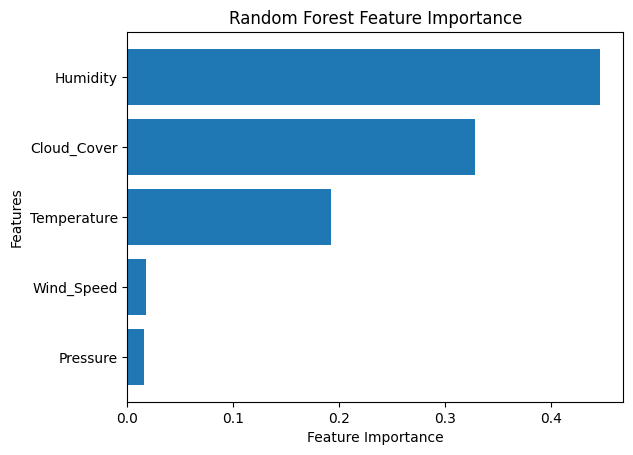

In [20]:
# Plot
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Saving Model to PKL File

In [22]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(clf, f)


# Loading the Saved Model

In [23]:
# Load the model
with open("random_forest_model.pkl", "rb") as f:
    clf_loaded = pickle.load(f)

# Taking Predictions

In [24]:
# Example prediction
y_pred = clf_loaded.predict([[24, 90, 3, 70, 985]])
print("Prediction:", y_pred)

Prediction: [0]
